## Peak Couting chart Export
[script](https://code.earthengine.google.com/05a384f7864b808ee5018d6d94772101)

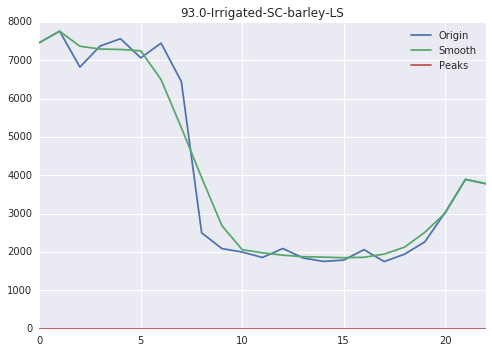

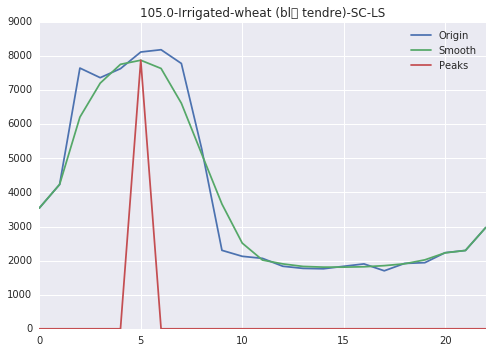

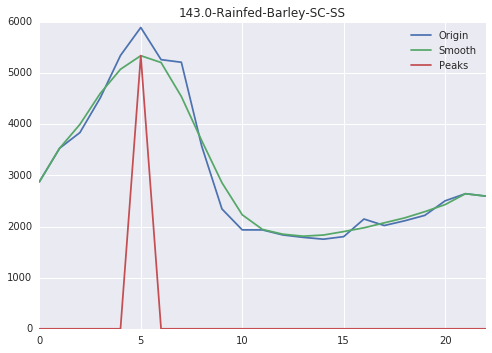

In [19]:
from pdata import *
BAND_AXIS = 1

def parse(f):
#   // convert properties to array
#   // var temp = f.select(["^(T).*$"]).toDictionary().values();  
  intensity = ee.Number(-1)
  s = ee.String(f.get('label'))  
  intensity = intensity.max(ee.Number(ee.Algorithms.If(s.rindex('SC').gt(-1), 1, intensity)))
  intensity = intensity.max(ee.Number(ee.Algorithms.If(s.rindex('-DC-').gt(-1), 2, intensity)))  
  return f.set('intensity', intensity).set('peakInput', ee.Array([f.select(["^(T).*$"]).toDictionary().values()]))

samples = load_ft('modists').map(parse).filter(ee.Filter.gt('intensity',-1))

def avgthenlocalmax(f):
    arr = ee.Array(f.get('peakInput'))  
    v1 = arr.slice(BAND_AXIS, 0, -4).multiply(0.125)
    v2 = arr.slice(BAND_AXIS, 1, -3).multiply(0.25)
    v3 = arr.slice(BAND_AXIS, 2, -2).multiply(0.25)
    v4 = arr.slice(BAND_AXIS, 3, -1).multiply(0.25)
    v5 = arr.slice(BAND_AXIS, 4).multiply(0.125)
    filtered = v1.add(v2).add(v3).add(v4).add(v5)
    
    f1 = filtered.slice(BAND_AXIS, 0, -2)
    f2 = filtered.slice(BAND_AXIS, 1, -1);
    f3 = filtered.slice(BAND_AXIS, 2);

  
    peaks = f2.gt(f1).And(f2.gt(f3))
    z2 = ee.Array([[0,0]]);
    fv = ee.Array.cat([arr.slice(BAND_AXIS, 0,2), filtered, arr.slice(BAND_AXIS, -2)], BAND_AXIS);
    z3 = ee.Array([[0,0,0]]);
    peaks = ee.Array.cat([z3, peaks, z3], BAND_AXIS).multiply(fv)
    f = f.set('peakOutput', peaks)
    f = f.set('peakFiltered', fv)
    return f;

# samples = samples.map(peakscountbydist);
n = samples.size().getInfo()
for i in range(n):
    samples = samples.map(avgthenlocalmax);
    sample = ee.Feature(samples.toList(1000).get(i));
    id = sample.get('id_1').getInfo()
    label = sample.get('label').getInfo()
    peakInput = ee.Array(sample.get('peakInput'))
    peakFiltered = ee.Array(sample.get('peakFiltered'))
    peakOutput = ee.Array(sample.get('peakOutput'))

    peakArray = ee.Array.cat([peakInput, peakFiltered, peakOutput],0)
    # print(peakArray.getInfo())
    # // print(peakArray)
    # // print(sample.toDictionary().select(['peakCount', 'intensity']))
    # print(Chart.array.values(peakArray,1))
    df = pd.DataFrame(peakArray.getInfo()).transpose()
    df.columns = ['Origin','Smooth','Peaks']
    df.plot(title='%s-%s' % (id, label));
    fig = gcf()
    fig.savefig('output/%s-%s.png' % (id, label))

In [15]:
print(dir(df))

['Origin', 'Peaks', 'Smooth', 'T', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_AXIS_SLICEMAP', '__abs__', '__add__', '__and__', '__array__', '__array_wrap__', '__bool__', '__bytes__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__invert__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__le__', '__len__', '__lt__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmod__', '__rmul__', '__ror__', '__rpow__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__setitem__', '__setstate__', '__sizeof__', '__str

In [8]:
df[:5]

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,4405,4201,7000.0,5642.000,4833.00,5636.000,5224.00,6077.00,3223.000,3882.000,...,2600.000,2500.000,2517.000,2408.000,2153.00,2419,2573.00,3934.000,4189,7476
1,4405,4201,5365.5,5598.375,5555.75,5388.125,5241.25,4820.75,4300.125,3650.125,...,2847.375,2628.625,2450.375,2384.375,2381.25,2579,3024.25,3910.875,4189,7476
2,0,0,0.0,5598.375,0.00,0.000,0.00,0.00,0.000,0.000,...,0.000,0.000,0.000,0.000,0.00,0,0.00,0.000,0,0


# Data

Export Intensity Samples[javascript](https://code.earthengine.google.com/88e68462d3eb6571b38409d99cd9a7b7)
Export Intensity Samples[javascript](https://code.earthengine.google.com/88e68462d3eb6571b38409d99cd9a7b7)

# Results

# Aanalysis